In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
sd = drive.CreateFile({'id': '1FqA_90JzVlXhM8SRXfLCyO-a9FEcvhxl'})
sd.GetContentFile('cat2_full_categories.tsv')

In [0]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import seaborn.apionly as sns
import matplotlib.pyplot as plt

In [0]:
sd = pd.read_table('cat2_full_categories.tsv',nrows=100000)
sd.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,state,id,link,county,newspaper,date,content,notice_id,category
0,0,1,1,1,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Notice of Auction\nOn Friday, March 17, 2017 a...",23983816.0,['Auctions']
1,1,9,9,9,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Public Notice\nOn October 28, 2015, the PA Sta...",23983815.0,['License Suspension']
2,2,16,16,16,Wyoming,3493/3302017_24045793,http://www.publicnoticeads.com/WY/search/view....,Fremont,Riverton Ranger,2017/02/24,Click to view PDF.\n\nREPAYMENT CONTRACT FOR S...,24045793.0,[]
3,3,17,17,17,Mississippi,626/2272017_23983812,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,NOTICE OF MEDICAL PRACTICE CLOSURE:\nEffective...,23983812.0,[]
4,4,19,19,19,Arkansas,3147/2272017_23983801,http://www.publicnoticeads.com/AR/search/view....,Sebastian,Times Record (Fort Smith),2017/02/24,Fort Smith Port Authority is requesting sealed...,23983801.0,[]


In [0]:
sd = sd.dropna()

In [0]:
!pip install gensim

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
from nltk.tag import pos_tag
np.random.seed(2018)
import re

In [0]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
  
def preprocess(text):
    result = []
#     print('=====================text===============================')
    text = re.sub('[^a-zA-Z0-9\n\.]', ' ', text)
#     print(text)
    tagged_sent = pos_tag(text.split())
    propernouns = [word for word,pos in tagged_sent if pos == 'NNP']
    propernouns = [p.lower() for p in propernouns]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in propernouns and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: DeprecationWarning: invalid escape sequence \.
<input>:8: Dep

In [0]:
processed_docs = sd['content'].map(preprocess)

In [0]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abandon
1 follow
2 hold
3 vehicl
4 wreck
5 assess
6 base
7 civil
8 disciplin
9 failur
10 impos


In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [0]:
bow_corpus[9998]

[(26, 1),
 (43, 3),
 (54, 1),
 (77, 1),
 (128, 1),
 (129, 1),
 (138, 3),
 (211, 1),
 (472, 4),
 (525, 1),
 (542, 1),
 (618, 1),
 (750, 1),
 (752, 1)]

In [0]:
bow_doc_4310 = bow_corpus[9998]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 26 ("date") appears 1 time.
Word 43 ("address") appears 3 time.
Word 54 ("know") appears 1 time.
Word 77 ("busi") appears 1 time.
Word 128 ("person") appears 1 time.
Word 129 ("place") appears 1 time.
Word 138 ("public") appears 3 time.
Word 211 ("name") appears 1 time.
Word 472 ("member") appears 4 time.
Word 525 ("limit") appears 1 time.
Word 542 ("reserv") appears 1 time.
Word 618 ("street") appears 1 time.
Word 750 ("compani") appears 1 time.
Word 752 ("liabil") appears 1 time.


In [0]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4952985409466431),
 (1, 0.19527676073764788),
 (2, 0.2806595700926324),
 (3, 0.3886976861465138),
 (4, 0.6976321785523536)]


In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=50, id2word=dictionary, passes=2, workers=2)

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.135*"meet" + 0.065*"hold" + 0.033*"regular" + 0.026*"attend" + 0.024*"public" + 0.023*"agenda" + 0.019*"locat" + 0.018*"offic" + 0.016*"contact" + 0.015*"month"
Topic: 1 
Words: 0.093*"address" + 0.067*"revis" + 0.055*"accord" + 0.052*"statut" + 0.050*"remov" + 0.048*"have" + 0.047*"convict" + 0.046*"capac" + 0.045*"design" + 0.044*"resign"
Topic: 2 
Words: 0.084*"shall" + 0.029*"director" + 0.022*"organ" + 0.020*"amend" + 0.019*"person" + 0.019*"purpos" + 0.018*"offic" + 0.018*"time" + 0.016*"law" + 0.014*"employe"
Topic: 3 
Words: 0.082*"member" + 0.081*"state" + 0.045*"statutori" + 0.034*"entiti" + 0.032*"agent" + 0.026*"date" + 0.023*"offic" + 0.023*"undersign" + 0.021*"director" + 0.021*"accept"
Topic: 4 
Words: 0.047*"say" + 0.036*"year" + 0.031*"hold" + 0.024*"vote" + 0.020*"follow" + 0.019*"accord" + 0.017*"levi" + 0.016*"declar" + 0.015*"collect" + 0.015*"provid"
Topic: 5 
Words: 0.034*"file" + 0.031*"project" + 0.028*"submit" + 0.025*"requir" + 0.024*"imag"

In [0]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=50, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.088*"decre" + 0.075*"point" + 0.041*"friday" + 0.037*"divers" + 0.031*"feet" + 0.027*"hear" + 0.022*"locat" + 0.022*"purpos" + 0.021*"acr" + 0.021*"year"
Topic: 1 Word: 0.043*"claim" + 0.027*"author" + 0.023*"contract" + 0.017*"designe" + 0.015*"say" + 0.014*"date" + 0.013*"work" + 0.012*"have" + 0.012*"accord" + 0.012*"term"
Topic: 2 Word: 0.026*"posit" + 0.026*"applic" + 0.020*"pick" + 0.019*"employ" + 0.012*"accept" + 0.012*"school" + 0.012*"equal" + 0.010*"student" + 0.010*"licens" + 0.010*"opportun"
Topic: 3 Word: 0.053*"nnooc" + 0.026*"request" + 0.022*"tax" + 0.016*"redempt" + 0.014*"properti" + 0.013*"hold" + 0.012*"give" + 0.012*"situat" + 0.011*"real" + 0.011*"deliv"
Topic: 4 Word: 0.041*"organ" + 0.029*"shall" + 0.020*"exclus" + 0.020*"asset" + 0.018*"purpos" + 0.017*"correspond" + 0.017*"distribut" + 0.016*"exempt" + 0.015*"train" + 0.015*"charit"
Topic: 5 Word: 0.028*"appear" + 0.028*"caus" + 0.023*"answer" + 0.023*"default" + 0.023*"file" + 0.021*"enter" 

In [0]:
for index, score in sorted(lda_model_tfidf[bow_corpus[9998]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9009338021278381	 
Topic: 0.064*"member" + 0.056*"manag" + 0.038*"address" + 0.035*"compani" + 0.032*"limit" + 0.031*"liabil" + 0.021*"busi" + 0.021*"know" + 0.020*"scottsdal" + 0.019*"name"

Score: 0.06809844076633453	 
Topic: 0.013*"properti" + 0.009*"tennesse" + 0.009*"record" + 0.009*"describ" + 0.008*"certain" + 0.008*"associ" + 0.008*"purchas" + 0.007*"subject" + 0.007*"time" + 0.007*"say"


In [0]:
!pip install pyLDAvis

In [0]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [0]:
vis_data = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(vis_data)

In [0]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 6.4MB/s 


In [0]:
from wordcloud import WordCloud
from collections import defaultdict

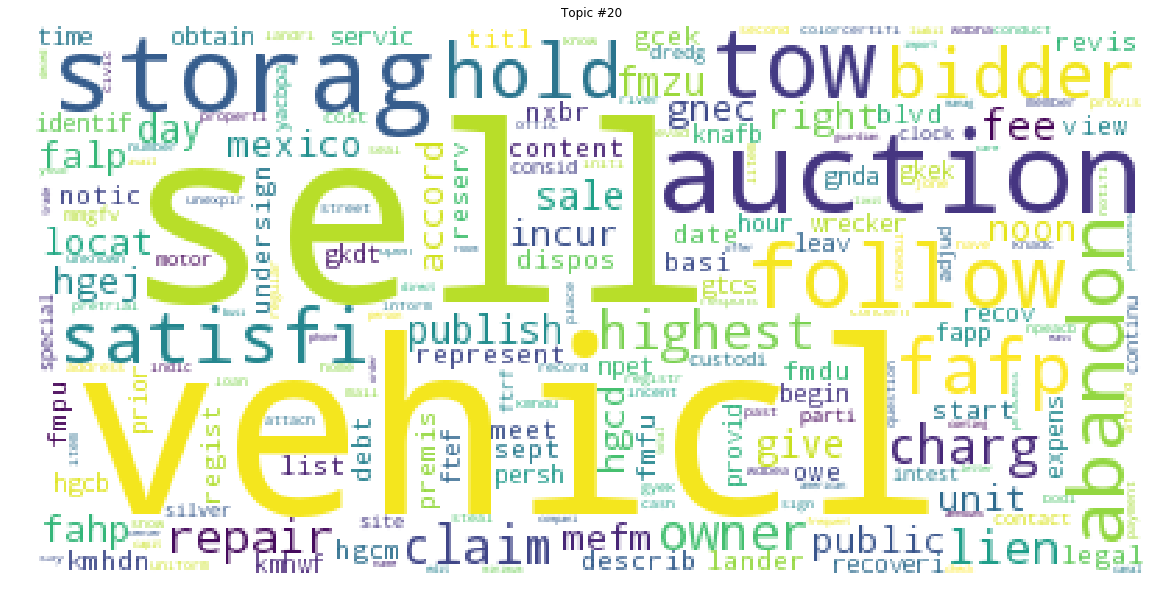

In [0]:
t = 20
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model_tfidf.show_topic(t, 1000))))
plt.axis("off")
plt.title("Topic #" + str(t))
plt.show()

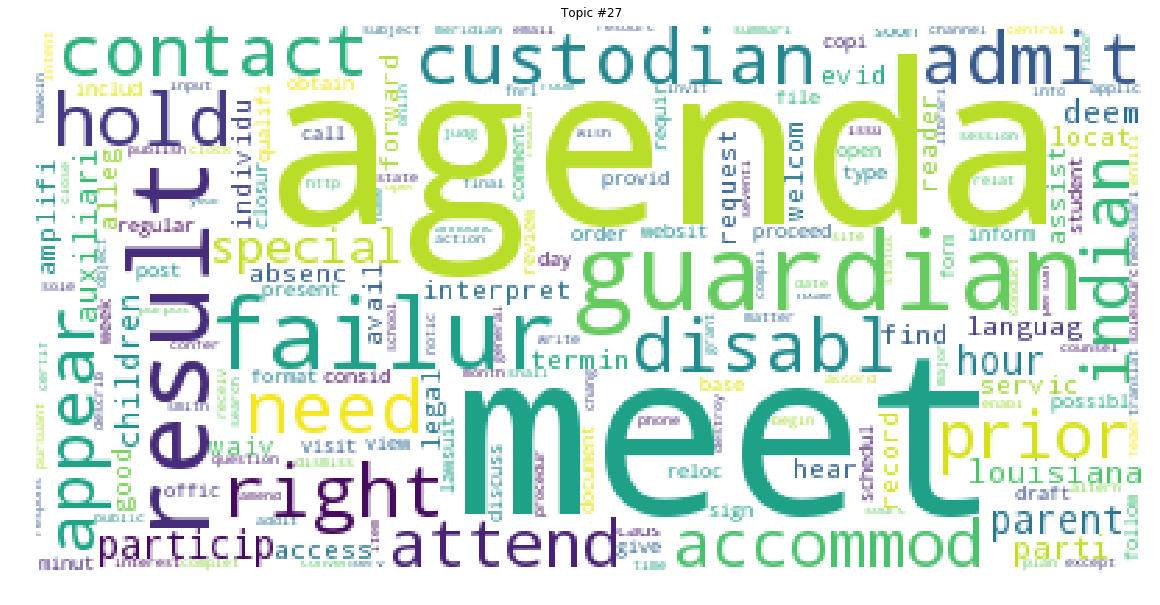

In [0]:
t = 27
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model_tfidf.show_topic(t, 1000))))
plt.axis("off")
plt.title("Topic #" + str(t))
plt.show()

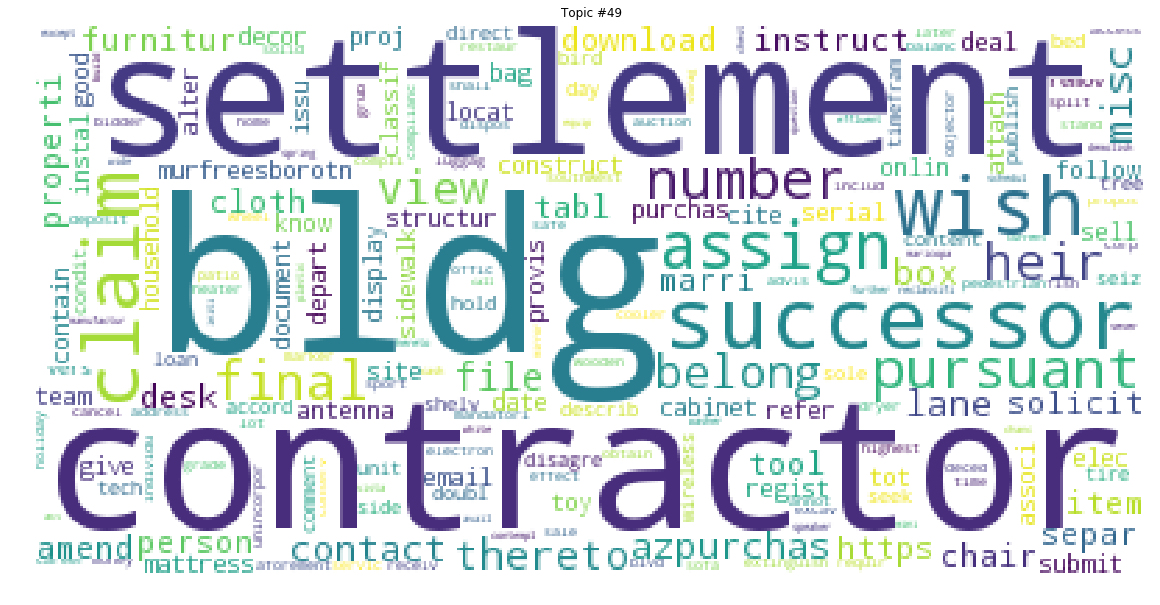

In [0]:
t = 49
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model_tfidf.show_topic(t, 1000))))
plt.axis("off")
plt.title("Topic #" + str(t))
plt.show()